In [1]:
# Evaluate qualitative results for annotated examples

In [2]:
import pandas as pd
from pathlib import Path
from nltk.metrics.agreement import AnnotationTask
from nltk.metrics import interval_distance

In [3]:
# Definitions
# Read labelings in BioC format
data_path = '/home/s_hegs02/MedTator'
data_path = Path(data_path)

# Files
excel_annotator_1_path = data_path / '20_label_halus_qualitative_annotator_1/qualitative_evaluation_annotator_1.xlsx'
excel_annotator_2_path = data_path / '21_label_halus_qualitative_annotator_2/qualitative_evaluation_annotator_2.xlsx'

# Rating columns
num_models = 5
columns = [[f"Con {i}", f"Rel {i}", f"Sim {i}", f"Flu {i}", f"Coh {i}"] for i in range(0, 5)]
columns = [item for sublist in columns for item in sublist]

In [4]:
def prepare_ratings_df(path):
    # Use pandas to read first sheet starting with line 56 as header
    df = pd.read_excel(path, sheet_name=0, header=55)
    # Remove columns starting with Unnamed
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    # Use id as index
    df.set_index('id', inplace=True)
    # Verify that all entries are between 1 and 5
    assert df.values.min() >= 1 and df.values.max() <= 5
    # Verify no empty cells
    assert df.isnull().values.any() == False
    # Verify that all columns are present
    assert set(columns) == set(df.columns)
    # Print number of rows
    print(f"  Number of documents: {len(df)}")
    return df

print("Annotator 1:")
annotator_1_randomized = prepare_ratings_df(excel_annotator_1_path)
# print(annotator_1_randomized)
print("Annotator 2:")
annotator_2_randomized = prepare_ratings_df(excel_annotator_2_path)

Annotator 1:
  Number of documents: 20
Annotator 2:
  Number of documents: 20


In [7]:
# Determine inter-annotator agreement

# For each metric and for all categories
all_triples = []
for metric in ["Rel", "Con", "Sim", "Flu", "Coh"]:
    metric_triples = []
    for model in range(0, num_models):
        a1_ratings = annotator_1_randomized[metric + " " + str(model)].astype(int).tolist()
        a2_ratings = annotator_2_randomized[metric + " " + str(model)].astype(int).tolist()
        for i in range(len(a1_ratings)):
            id = metric + "_" + str(model) + "_" + str(i)
            metric_triples.append(('coder_1', id, a1_ratings[i]))
            metric_triples.append(('coder_2', id, a2_ratings[i]))
    
    # print(metric_triples)
    t = AnnotationTask(metric_triples, distance=interval_distance)
    result = t.alpha()
    print(f"Inter-annotator agreement ({metric}): {result:3f}") 
    
    all_triples.extend(metric_triples)
    
t = AnnotationTask(all_triples, distance=interval_distance)
result = t.alpha()
print(f"Inter-annotator agreement (all): {result:.3f}")

Inter-annotator agreement (Rel): 0.4566845283275368
Inter-annotator agreement (Con): 0.7776772889290844
Inter-annotator agreement (Sim): 0.6334724950884087
Inter-annotator agreement (Flu): 0.43144682353696506
Inter-annotator agreement (Coh): 0.2177537796976241
Inter-annotator agreement (all): 0.5860422502951177


In [5]:
# Undo randomization
# Insert form randomization of creation (for seed 2)
qualitative_random_models = {0: [2, 4, 3, 0, 1], 1: [4, 3, 2, 1, 0], 2: [3, 1, 2, 0, 4], 3: [1, 2, 3, 0, 4], 4: [3, 1, 4, 2, 0], 5: [3, 2, 4, 1, 0], 6: [3, 2, 1, 4, 0], 7: [2, 0, 3, 4, 1], 8: [4, 1, 3, 0, 2], 9: [2, 4, 0, 3, 1], 10: [0, 2, 1, 4, 3], 11: [1, 0, 3, 4, 2], 12: [3, 0, 1, 2, 4], 13: [0, 3, 4, 1, 2], 14: [2, 3, 4, 0, 1], 15: [1, 0, 4, 3, 2], 16: [2, 0, 4, 3, 1], 17: [0, 3, 1, 4, 2], 18: [0, 1, 4, 2, 3], 19: [1, 4, 2, 3, 0], 20: [4, 1, 0, 3, 2], 21: [2, 4, 0, 1, 3], 22: [0, 3, 2, 1, 4], 23: [2, 4, 3, 0, 1], 24: [3, 1, 4, 2, 0], 25: [3, 1, 2, 0, 4], 26: [2, 3, 0, 1, 4], 27: [2, 3, 0, 4, 1], 28: [4, 0, 3, 1, 2], 29: [0, 1, 3, 2, 4], 30: [1, 3, 0, 4, 2], 31: [1, 3, 4, 0, 2], 32: [3, 0, 1, 2, 4], 33: [4, 2, 3, 0, 1], 34: [2, 3, 4, 1, 0], 35: [1, 0, 4, 3, 2], 36: [4, 3, 1, 2, 0], 37: [3, 0, 2, 1, 4], 38: [0, 2, 4, 1, 3], 39: [3, 2, 0, 4, 1], 40: [4, 3, 2, 1, 0], 41: [4, 2, 0, 1, 3], 42: [4, 0, 2, 3, 1], 43: [0, 1, 3, 4, 2], 44: [1, 2, 4, 0, 3], 45: [2, 3, 0, 1, 4], 46: [3, 1, 2, 4, 0], 47: [4, 3, 1, 2, 0], 48: [4, 0, 1, 2, 3], 49: [3, 0, 4, 1, 2]}

def undo_randomization(df):
    # Copy dataframe
    df_unrandomized = df.copy()
    df_unrandomized[:] = -1
    # For each row use entry with id in qualitative_random_models amd reorder "Rel {i}", "Con {i}", "Flu {i}", "Coh {i}" based on the randomization
    for id, row in df.iterrows():
        for i in range(0, num_models):
            df_unrandomized.loc[id, f"Con {i}"] = row[f"Con {qualitative_random_models[id].index(i)}"]
            df_unrandomized.loc[id, f"Rel {i}"] = row[f"Rel {qualitative_random_models[id].index(i)}"]
            df_unrandomized.loc[id, f"Sim {i}"] = row[f"Sim {qualitative_random_models[id].index(i)}"]
            df_unrandomized.loc[id, f"Flu {i}"] = row[f"Flu {qualitative_random_models[id].index(i)}"]
            df_unrandomized.loc[id, f"Coh {i}"] = row[f"Coh {qualitative_random_models[id].index(i)}"]
    return df_unrandomized

annotator_1 = undo_randomization(annotator_1_randomized)
annotator_2 = undo_randomization(annotator_2_randomized)

# Debug print first row for each annotator
# print(annotator_1.iloc[0])
# print(annotator_2.iloc[0])

In [6]:
# Join annotations by adding annotations from annotator 2 at the end of annotator 1
annotator_1_2 = pd.concat([annotator_1, annotator_2], axis=0)
print(f"Number of documents: {len(annotator_1_2)}")

Number of documents: 40


In [7]:
# Create booktabs latex table with columns Model, Rel, Con, Flu, Coh containing mean and std
# Create dataframe with columns: Model, Metric, Mean, Std
models = ['original_examples', 'led_large_original', 'llama_70b_cleaned_improved', 'gpt4_zero_shot', 'gpt4_cleaned_improved']

latex_results = []
for model in range(0, num_models):
    row = []
    for metric in ["Rel", "Con", "Sim", "Flu", "Coh"]:
        key = f"{metric} {model}"
        # With SD
        # row.append(f"${annotator_1_2[key].mean():.2f}$ (${annotator_1_2[key].std():.2f}$)")
        row.append(f"${annotator_1_2[key].mean():.2f}$")
    latex_results.append([model] + row)
    
latex_results = pd.DataFrame(latex_results, columns=["Model", "Rel.", "Con.", "Sim.", "Flu.", "Coh."])
print(latex_results.to_latex(index=False, escape=False, column_format="lcccc"))

\begin{tabular}{lcccc}
\toprule
Model & Rel. & Con. & Sim. & Flu. & Coh. \\
\midrule
0 & $2.02$ & $2.83$ & $4.10$ & $4.05$ & $3.88$ \\
1 & $2.05$ & $3.02$ & $3.73$ & $3.45$ & $3.40$ \\
2 & $1.93$ & $3.88$ & $3.88$ & $3.80$ & $3.62$ \\
3 & $4.33$ & $4.42$ & $4.58$ & $4.85$ & $4.90$ \\
4 & $4.00$ & $4.67$ & $4.53$ & $4.92$ & $4.95$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_62202/1945221034.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


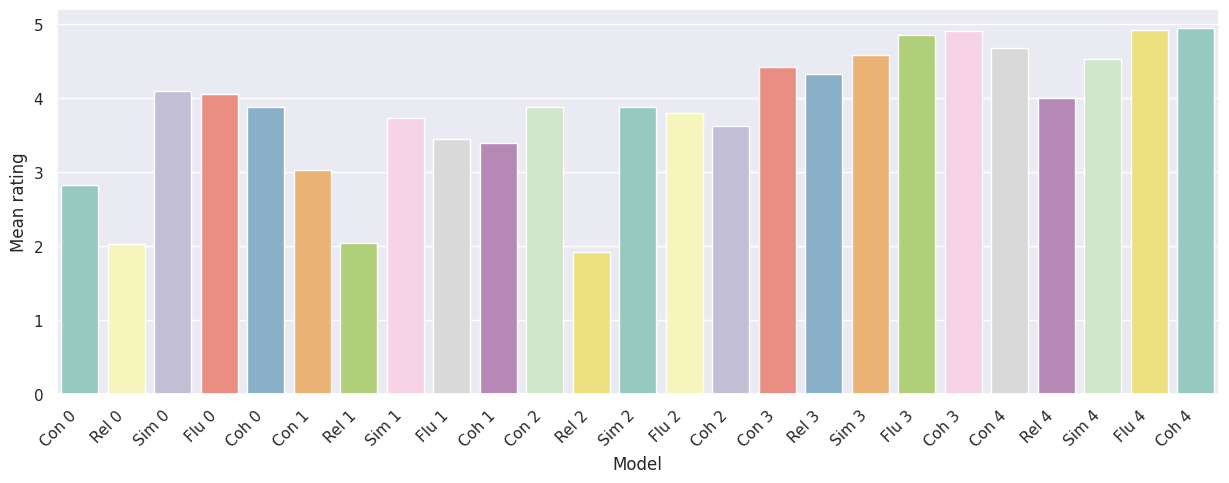

In [8]:
# Plot mean ratings for each model
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe with mean ratings for each model
df_mean_annotator_1_2 = pd.DataFrame(columns=columns)
for i in range(0, num_models):
    df_mean_annotator_1_2.loc[i] = annotator_1_2.loc[:, [f"Con {i}", f"Rel {i}", f"Sim {i}", f"Flu {i}", f"Coh {i}"]].mean()
    
# Plot make wider, color each model differently
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=df_mean_annotator_1_2, palette="Set3")
ax.set(xlabel='Model', ylabel='Mean rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

  Con 0 Rel 0 Sim 0 Flu 0 Coh 0 Con 1 Rel 1 Sim 1 Flu 1 Coh 1  ... Con 3  \
1   0.3  0.15   0.1     0     0   0.1  0.25  0.05  0.05     0  ...     0   
2   0.1   0.3     0     0  0.05  0.35   0.2  0.05     0     0  ...     0   
3  0.25   0.3  0.15   0.1  0.05  0.25  0.15  0.15  0.05   0.2  ...  0.05   
4   0.3   0.2  0.25  0.45  0.25   0.2   0.4   0.4   0.9  0.45  ...  0.55   
5  0.05  0.05   0.5  0.45  0.65   0.1     0  0.35     0  0.35  ...   0.4   

  Rel 3 Sim 3 Flu 3 Coh 3 Con 4 Rel 4 Sim 4 Flu 4 Coh 4  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3   0.1     0     0     0  0.05   0.2     0     0     0  
4   0.4   0.4  0.05  0.05  0.35  0.25   0.5   0.1  0.05  
5   0.5   0.6  0.95  0.95   0.6  0.55   0.5   0.9  0.95  

[5 rows x 25 columns]


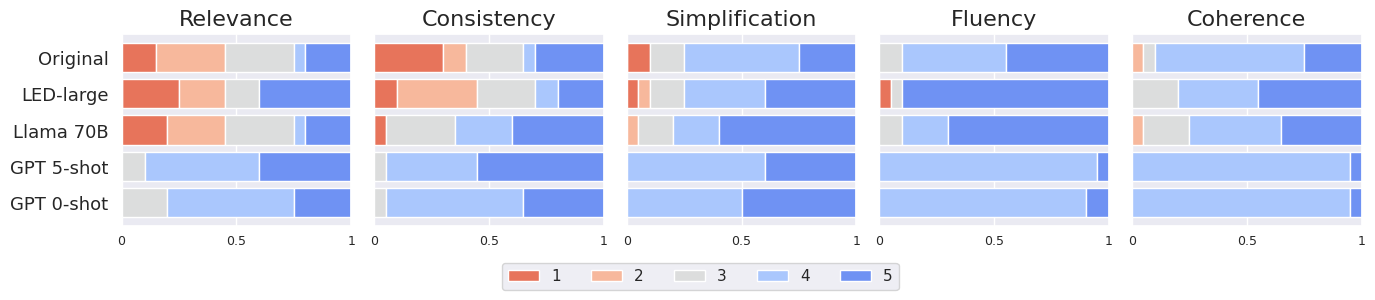

In [17]:
# Create a stacked bar plot for the answer counts of each class 1,2,3,4,5
# Create dataframe with mean ratings for each model

# Only for con print(annotator_1.loc[:, [f"Con {i}"]].value_counts(normalize=True).sort_index())
# Use index to 1, 2, 3, 4, 5
df_counts_annotator_1_2 = pd.DataFrame(columns=columns, index=[1, 2, 3, 4, 5])
for i in range(0, num_models):
    for metric in ["Con", "Rel", "Sim", "Flu", "Coh"]:
        key = f"{metric} {i}"
        # Set counts to default 0 for 1, 2, 3, 4, 5
        df_counts_annotator_1_2.loc[:, key] = [0, 0, 0, 0, 0]
        counts = annotator_1.loc[:, [key]].value_counts(normalize=True).sort_index()
        for j in range(1, 6):
            if j in counts.index:
                df_counts_annotator_1_2.loc[j, key] = counts[j]
print(df_counts_annotator_1_2)

# Create a subplot for each metric Con, Rel, Sim, Flu, Coh
metric_titles = {"Con": "Consistency", "Rel": "Relevance", "Sim": "Simplification", "Flu": "Fluency", "Coh": "Coherence"}
# model_titles = ["Model 5", "Model 4", "Model 3", "Model 2", "Model 1"]
model_titles = ["Original", "LED-large", "Llama 70B", "GPT 0-shot", "GPT 5-shot"]
model_titles = model_titles[::-1]

# Swap the entire rows 4 and 5
df_counts_annotator_1_2.iloc[3], df_counts_annotator_1_2.iloc[4] =  df_counts_annotator_1_2.iloc[4].copy(), df_counts_annotator_1_2.iloc[3].copy()
model_titles = ["Original", "LED-large", "Llama 70B", "GPT 5-shot", "GPT 0-shot"]
model_titles = model_titles[::-1]

# Combine these subplots into one figure with size 15,5
fix, ax = plt.subplots(1, 5, sharey=True, figsize=(16,2.5))
# Set color palette as five different colors from diverging spectral palette
sns.set_palette(sns.color_palette("coolwarm_r", 5))
for k, metric in enumerate(["Rel", "Con", "Sim", "Flu", "Coh"]):
    # Create dataframe with only the metric columns
    df_counts_annotator_1_2_metric = df_counts_annotator_1_2.loc[:, [f"{metric} {i}" for i in range(num_models - 1, -1, -1)]]
    # Transpose dataframe
    df_counts_annotator_1_2_metric = df_counts_annotator_1_2_metric.transpose()
    # Create horiztonal stacked bar subplot with less space between bars
    df_counts_annotator_1_2_metric.plot(kind="barh", stacked=True, ax=ax[k], legend=False, width=0.8)
    
    # Set title
    ax[k].set_title(metric_titles[metric])
    ax[k].title.set_size(16)
    # Set x max to 1
    ax[k].set_xlim(0, 1)
    ax[k].set_xticks([0, 0.5, 1])
    ax[k].tick_params(axis='x', labelsize=9)
    ax[k].set_xticklabels(["0", "0.5", "1"])
    # Set distance of x ticks to plot to 0
    ax[k].tick_params(axis='x', pad=0)
    # Set y ticks to model titles
    ax[k].set_yticklabels(model_titles)
    # Set font size of y ticks
    ax[k].tick_params(axis='y', labelsize=13)
    
# Reduce horizontal space between subplots
plt.subplots_adjust(wspace=0.1)
    
    
# Add legend to last subplot with additional space to the left
# ax[4].legend(title="Rating", loc='center left', bbox_to_anchor=(1.1, 0.5))

# Add legend to the bottom of the plot
ax[4].legend(loc='upper center', bbox_to_anchor=(-1.88, -0.15), ncol=5)


# Plot
# plt.show()

# Store as pdf
fig = ax[0].get_figure()
fig.savefig("qualitative_evaluation.pdf", bbox_inches='tight')